In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
#Perform data pre-processing operations.
df= pd.read_csv(r"C:\Users\shouv\cardio_train.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,20228,1,156,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,2,18857,1,165,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,3,17623,2,169,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,4,17474,1,156,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25673,36645,18108,2,184,126.0,130.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
25674,36646,21232,2,163,65.0,150.0,75.0,1.0,1.0,0.0,0.0,1.0,1.0
25675,36649,20347,2,176,68.0,140.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
25676,36650,19768,2,178,76.0,120.0,80.0,2.0,2.0,1.0,0.0,1.0,0.0


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,25678.000000,25678.000000,25678.000000,25678.000000,25677.000000,25677.000000,25677.000000,25677.000000,25677.000000,25677.000000,25677.000000,25677.000000,25677.000000
mean,18325.219916,19455.260145,1.350534,164.395864,74.176493,128.405382,97.542665,1.363088,1.224598,0.091288,0.054718,0.804144,0.496164
std,10601.552513,2474.454825,0.477146,8.258790,14.357545,143.790766,209.410589,0.677457,0.570260,0.288024,0.227434,0.396866,0.499995
min,0.000000,10798.000000,1.000000,1.000000,30.000000,-140.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9135.250000,17636.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,18311.500000,19695.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,27513.500000,21314.750000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,36651.000000,23690.000000,2.000000,250.000000,200.000000,14020.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         1
ap_hi          1
ap_lo          1
cholesterol    1
gluc           1
smoke          1
alco           1
active         1
cardio         1
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
#checking for duplicated values (rows)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


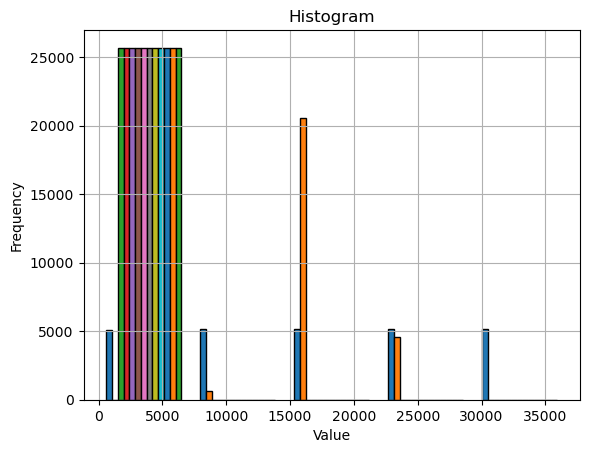

In [16]:
#As a part of data analysis and visualizations draw all the possible plots to provide essential informations and to derive some meaningful insights.
#Histogram import matplotlib.pyplot as plt
plt.hist(df, bins=5, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

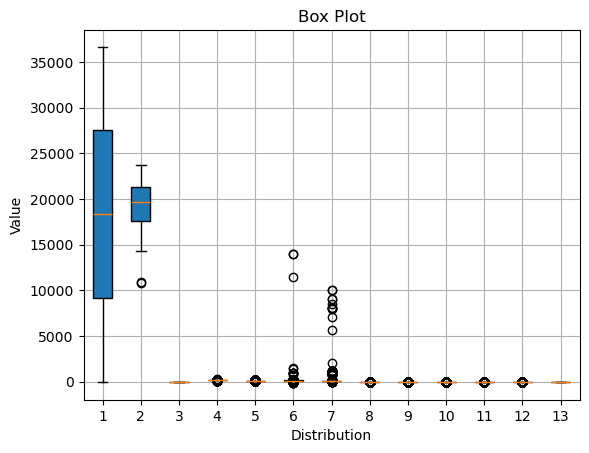

In [18]:
#Box Plot
plt.boxplot(df, vert=True, patch_artist=True)
plt.xlabel('Distribution')
plt.ylabel('Value')
plt.title('Box Plot')
plt.grid(True)
plt.show()

In [20]:
#Show your correlation matrix of features according to the datasets.
#In this we find the correlation matrix.
corr_matrix = df[["id", "age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]].corr()
corr_matrix

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,-0.000962,0.003957,0.001242,-0.007695,0.010769,0.001328,-0.001743,0.003152,0.005309,0.003493,0.015006,-0.000082
age,-0.000962,1.000000,-0.020027,-0.078736,0.047959,0.023109,0.017766,0.160430,0.092729,-0.042907,-0.030004,-0.018092,0.237540
gender,0.003957,-0.020027,1.000000,0.498962,0.155279,0.005455,0.013075,-0.041302,-0.023243,0.341046,0.171746,0.009606,0.004330
height,0.001242,-0.078736,0.498962,1.000000,0.284264,0.009308,0.006473,-0.055618,-0.020297,0.197462,0.101586,-0.005331,-0.011751
weight,-0.007695,0.047959,0.155279,0.284264,1.000000,0.032496,0.040035,0.134988,0.098943,0.076150,0.076843,-0.014462,0.179763
ap_hi,0.010769,0.023109,0.005455,0.009308,0.032496,1.000000,0.015330,0.035761,0.018992,-0.000581,0.001153,0.007543,0.061865
ap_lo,0.001328,0.017766,0.013075,0.006473,0.040035,0.015330,1.000000,0.019911,0.008075,0.005325,0.019699,0.003670,0.066415
cholesterol,-0.001743,0.160430,-0.041302,-0.055618,0.134988,0.035761,0.019911,1.000000,0.447216,0.009166,0.027770,0.016944,0.225738
gluc,0.003152,0.092729,-0.023243,-0.020297,0.098943,0.018992,0.008075,0.447216,1.000000,0.004634,0.010342,-0.003527,0.086686
smoke,0.005309,-0.042907,0.341046,0.197462,0.076150,-0.000581,0.005325,0.009166,0.004634,1.000000,0.336362,0.026606,-0.012172


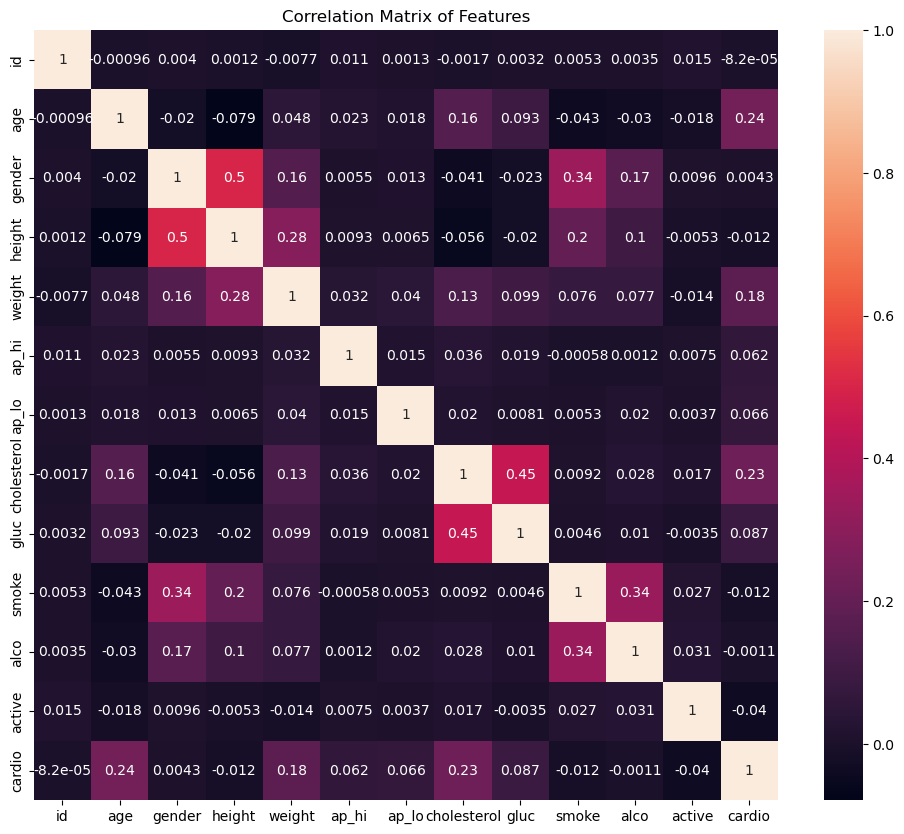

In [22]:
#In this we make the heatmap of the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [26]:
#Find out accuracy levels of various machine learning techniques such as Support Vector Machines (SVM), K-Nearest Neighbor (KNN), Decision Trees (DT) , Logistic Regression (LR) and Random Forest (RF).
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load a dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the classifiers
classifiers = {
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store the accuracy of each classifier
accuracy_scores = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Print the accuracy of each classifier
for name, accuracy in accuracy_scores.items():
    print(f'{name}: {accuracy:.2f}')

Support Vector Machine: 1.00
K-Nearest Neighbors: 1.00
Decision Tree: 1.00
Logistic Regression: 1.00
Random Forest: 1.00


In [28]:
#Build your Machine learning model for heart disease detection according to the result.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\shouv\cardio_train.csv")

# Display the first few rows of the dataset
print(data.head())

# Preprocessing
# Handle missing values if any (in this dataset, there are no missing values)
# Convert categorical columns to dummy variables if necessary
# In this dataset, 'thal' and 'cp' are categorical

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, columns=['cp', 'thal', 'slope'], drop_first=True)

# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the classifiers
classifiers = {
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store the accuracy of each classifier
accuracy_scores = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    print(f'\n{name}')
    print('Accuracy: {:.2f}'.format(accuracy_scores[name]))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Print the accuracy of each classifier
print('\nModel Comparison:')
for name, accuracy in accuracy_scores.items():
    print(f'{name}: {accuracy:.2f}')

# Selecting the best model (based on accuracy in this case)
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = classifiers[best_model_name]

print(f'\nBest Model: {best_model_name} with accuracy of {accuracy_scores[best_model_name]:.2f}')

# Train the best model on the entire dataset
best_model.fit(X_train, y_train)
final_predictions = best_model.predict(X_test)

# Final evaluation
print('\nFinal Evaluation on Test Set:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, final_predictions)))
print('Classification Report:')
print(classification_report(y_test, final_predictions))
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test, final_predictions), annot=True, fmt='d', cmap='Blues')
plt.title(f'Final {best_model_name} Confusion Matrix')
plt.show()


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0  110.0   80.0          1.0   1.0    0.0   
1   1  20228       1     156    85.0  140.0   90.0          3.0   1.0    0.0   
2   2  18857       1     165    64.0  130.0   70.0          3.0   1.0    0.0   
3   3  17623       2     169    82.0  150.0  100.0          1.0   1.0    0.0   
4   4  17474       1     156    56.0  100.0   60.0          1.0   1.0    0.0   

   alco  active  cardio  
0   0.0     1.0     0.0  
1   0.0     1.0     1.0  
2   0.0     0.0     1.0  
3   0.0     1.0     1.0  
4   0.0     0.0     0.0  


KeyError: "None of [Index(['cp', 'thal', 'slope'], dtype='object')] are in the [columns]"